<a href="https://colab.research.google.com/github/shymfonyy/Predictive-Data-Mining/blob/main/FinalDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Membaca dataset
file_path = 'ObesityDataSet.csv'
data = pd.read_csv(file_path)

# 1. Menangani missing values
if data.isnull().sum().sum() > 0:  # Cek apakah ada missing values
    for col in data.columns:
        if data[col].dtype == 'object':  # Jika kolom adalah tipe kategori
            data[col].fillna(data[col].mode()[0], inplace=True)  # Isi dengan modus
        else:  # Jika kolom adalah tipe numerik
            data[col].fillna(data[col].mean(), inplace=True)  # Isi dengan rata-rata

# 2. Menghapus data duplikasi
data = data.drop_duplicates()

# 3. Menangani outlier menggunakan IQR
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.3 * IQR
    upper_bound = Q3 + 1.3 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# 4. Encoding data kategorikal menjadi numerik
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 5. Normalisasi data numerik
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 6. Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['NObeyesdad'])  # Semua kolom kecuali target
y = data['NObeyesdad']  # Kolom target

# 7. Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# 8. Melatih model Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf.fit(X_train, y_train)

# 9. Melakukan prediksi pada data uji
y_pred = clf.predict(X_test)

# 10. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 11. Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 12. Menyimpan dataset yang telah dibersihkan
cleaned_file_path = 'Cleaned_ObesityDataSet.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Dataset yang telah dibersihkan disimpan di: {cleaned_file_path}")


Accuracy: 0.84
Confusion Matrix:
[[45  8  0  0  0  0  0]
 [ 3 42  0  0  0 12  0]
 [ 0  0 48  0  0  1 21]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  4  0  0  0 51  0]
 [ 0  0  0  0  0 15 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.78      0.74      0.76        57
           2       0.96      0.69      0.80        70
           3       1.00      0.97      0.98        60
           4       1.00      1.00      1.00        65
           5       0.65      0.93      0.76        55
           6       0.67      0.74      0.70        58

    accuracy                           0.84       418
   macro avg       0.86      0.84      0.84       418
weighted avg       0.86      0.84      0.84       418

Dataset yang telah dibersihkan disimpan di: Cleaned_ObesityDataSet.csv


In [4]:
!pip install graphviz
!pip install pydotplus

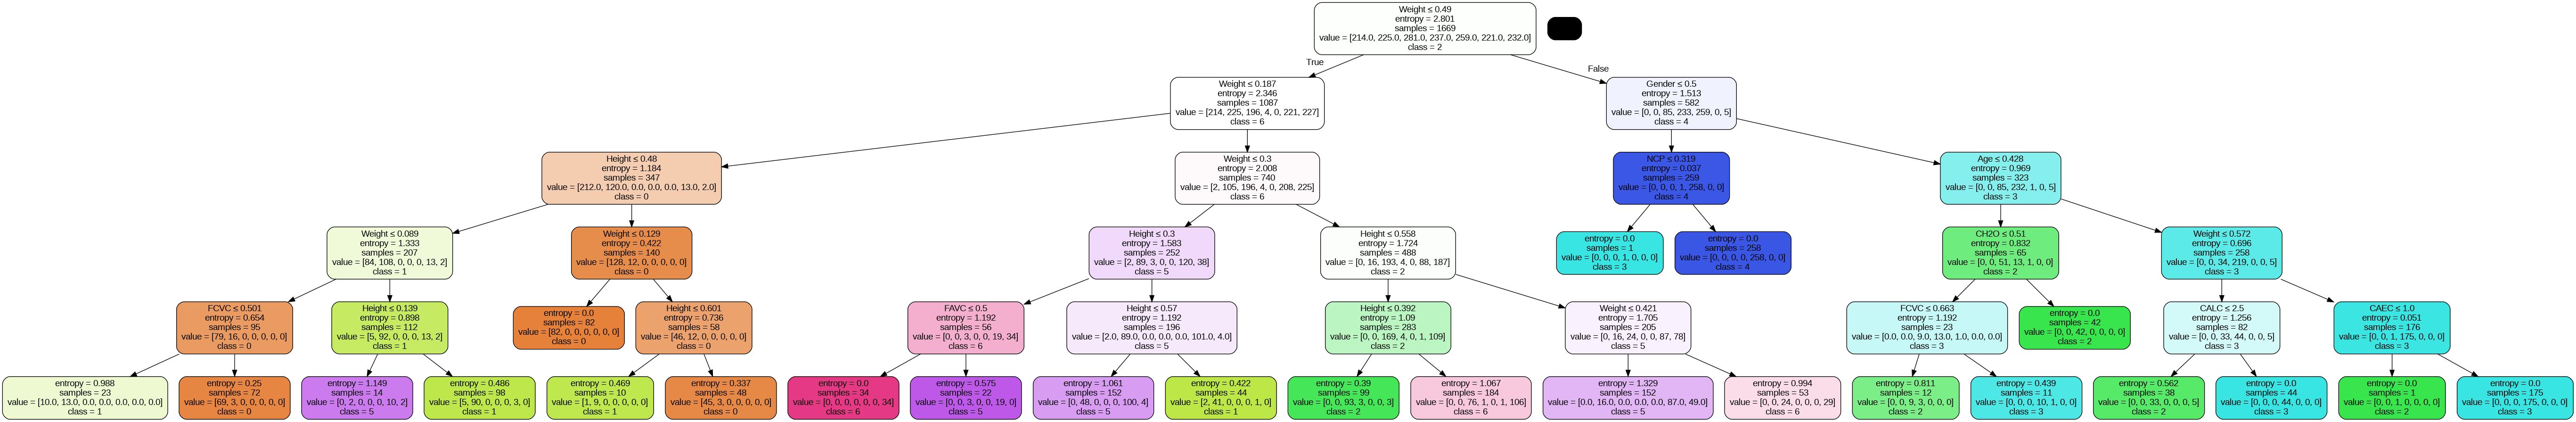

In [5]:
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz

# Assuming 'X' contains your features, get the column names
feature_cols = X.columns

# Get unique class names from your target variable 'y'
class_names = [str(i) for i in y.unique()]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                     feature_names=feature_cols,
                     class_names=['0','1','2','3','4','5','6'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())